1) Приведите еще примеры метрик для оценки рекомендаций/ранжирования (можно взять из интернета, или ваши знания)



Если в матрице интеракций используются 0/1 (факт покупки и непокупки), то в качестве метрики для оценки качества можно использовать все метрики для задач классификации (например, ROC-AUC). Также можно использовать F-score (гаромничеческое среднее между precision и recall)

Для ранжирования нашел следующую информацию в интернете:

• Немного другая формула для NDCG, Normalized Discounted Commulative Gain; выберем топ-𝑘
рекомендаций (𝑘 может быть заведомо больше нужного числа)
и посчитаем:

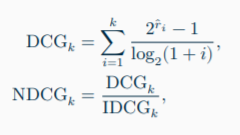

где ̂𝑟𝑖 – наша оценка рейтинга продукта на позиции 𝑖, а
IDCG𝑘 – значение DCG𝑘 при ранжировании по истинным
значениям (рейтингам из валидационного набора);
• NDCG от 0 до 1, но ей трудно придумать естественную
интерпретацию (как вероятность чего-нибудь, например).


• AUC, Area Under (ROC) Curve; можно считать по всей выдаче
сразу;
• AUC – вероятность того, что случайно выбранная пара
продуктов с разными оценками будет отранжирована
правильно (понравившийся будет выше в выдаче, чем не
понравившийся);
• в бинарном случае можно посчитать в замкнутом виде:

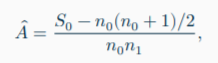

где 𝑛0
, 𝑛1 – число понравившихся и не понравившихся
пользователю объектов, 𝑆0 = ∑ 𝑝𝑖 – сумма номеров позиций
понравившихся объектов в выдаче

• но на самом деле простые метрики тоже важны, потому что
обычно пользователь успевает увидеть только несколько
самых верхних рекомендаций;

• WTA (winner takes all) – эта метрика равна 1, если
топ-рекомендация (с самым большим предсказанным
рейтингом) из просмотренных пользователем получила
положительную оценку, и 0 в противном случае;

• Top𝑘 – доля положительных оценок среди топ-𝑘 рекомендаций
(Top10 часто называют MAP – mean average precision).


2) Доделать все функции, где стоит комментарий "сделать дома"

In [4]:
import pandas as pd
import numpy as np

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)

In [1]:
def hit_rate_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(bought_list, recommended_list)
    
    hit_rate = (flags.sum() > 0) * 1
    
    return hit_rate

##Money_precision_at_k

In [111]:
def money_precision_at_k(recommended_list, bought_list,
                         prices_recommended, k=5):
        
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])

    prices_recommended = np.array(prices_recommended)
    
    flags = np.isin(recommended_list, bought_list)
    
    precision = (flags[:k]*prices_recommended[:k]).sum() / prices_recommended[:k].sum()

    return precision

In [90]:
bought_list = [1, 2, 3, 4, 8, 6, 10]
recommended_list = [1, 5, 6, 7, 8, 29, 40, 37, 2]

prices_recommended = [10, 2555, 23, 300, 455, 20, 400, 100, 100]

In [116]:
money_precision_at_k(recommended_list, bought_list,
                         prices_recommended, k=5)

0.14597666766377504

##Recall_at_k

In [93]:
def recall_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall

In [94]:
recall_at_k(recommended_list, bought_list, k=5)

0.42857142857142855

##Money_recall_at_k

In [125]:
def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])

    prices_recommended = np.array(prices_recommended)
    prices_bought = np.array(prices_bought)
    
    flags = np.isin(recommended_list, bought_list)
    
    recall = (flags[:k]*prices_recommended[:k]).sum() / prices_bought.sum()
    return recall

In [126]:
prices_bought = np.array([10, 100, 2000, 200, 455, 23, 518])

money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5)

0.14761040532365396